<a href="https://colab.research.google.com/github/DevpriyaSaini/ML-100/blob/main/power_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Box-pox transformer and yeo-johnson

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv("/content/concrete_data.csv")

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.shape

(1030, 9)

In [7]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("Strength",axis=1),df["Strength"],test_size=0.2,random_state=42)

In [12]:
#applying linearregression without tranform
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [14]:
r2_score(y_test,y_pred)

0.627553179231485

In [15]:
#cross validation with cross val score
lr=LinearRegression()
np.mean(cross_val_score(lr,df.drop("Strength",axis=1),df["Strength"],scoring="r2"))

np.float64(0.46099404916628606)

In [19]:
import matplotlib.pyplot as plt

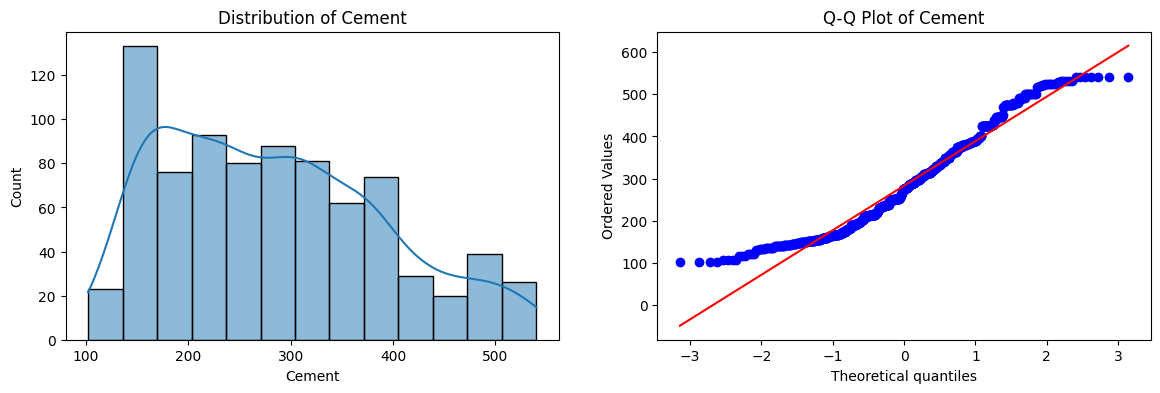

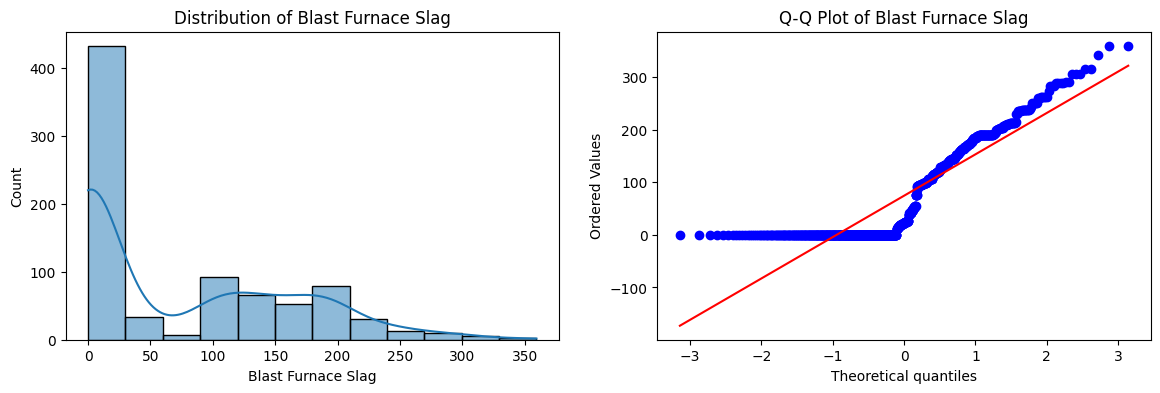

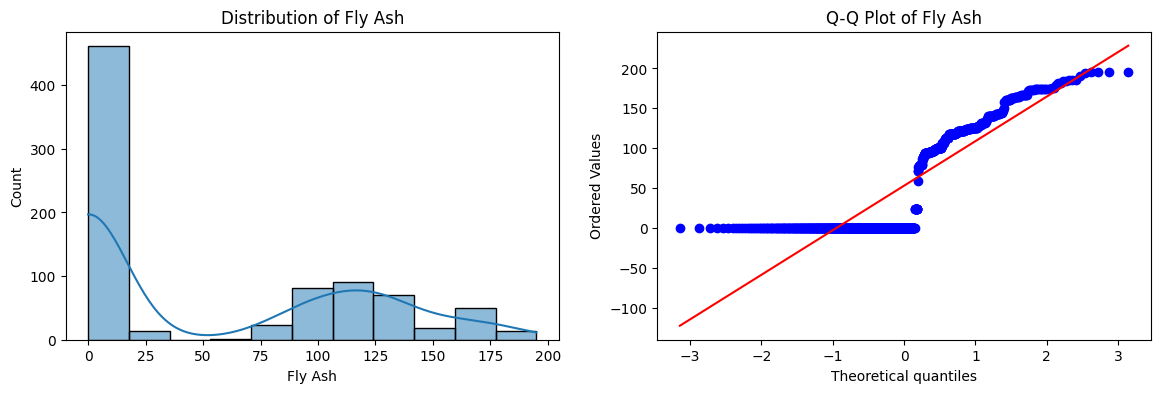

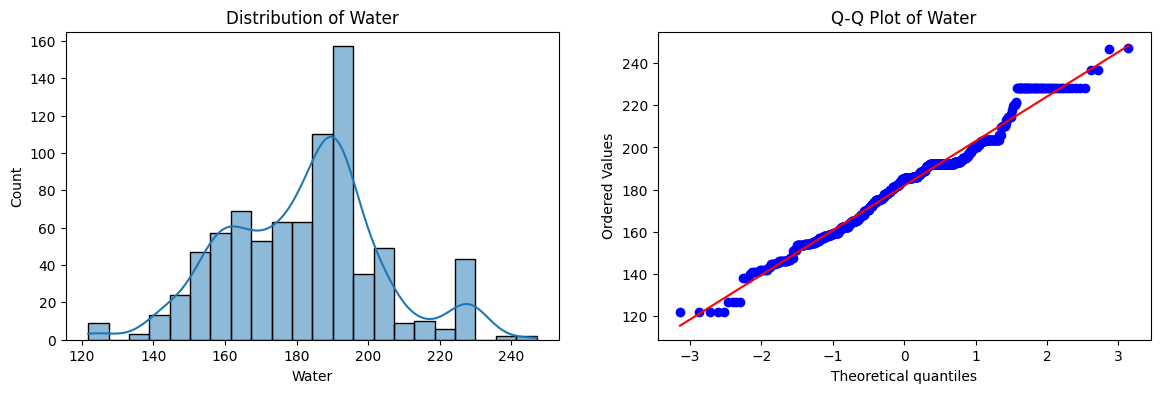

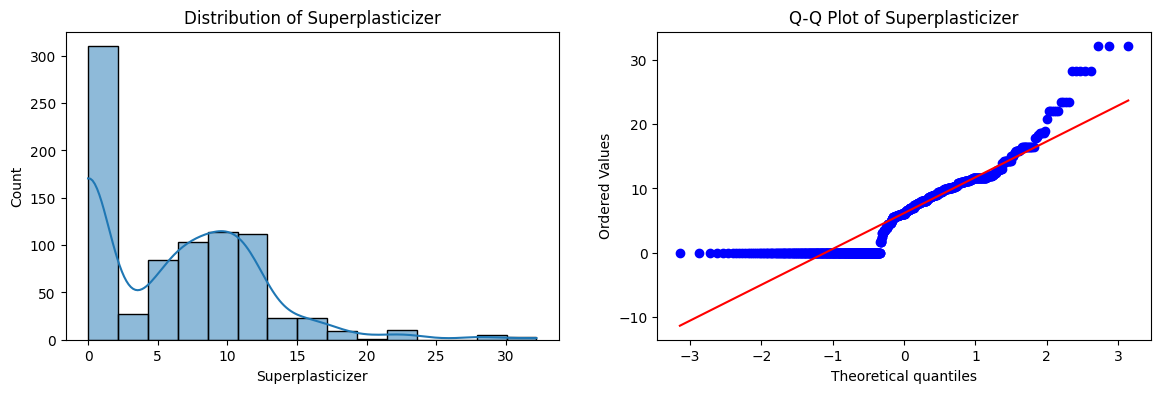

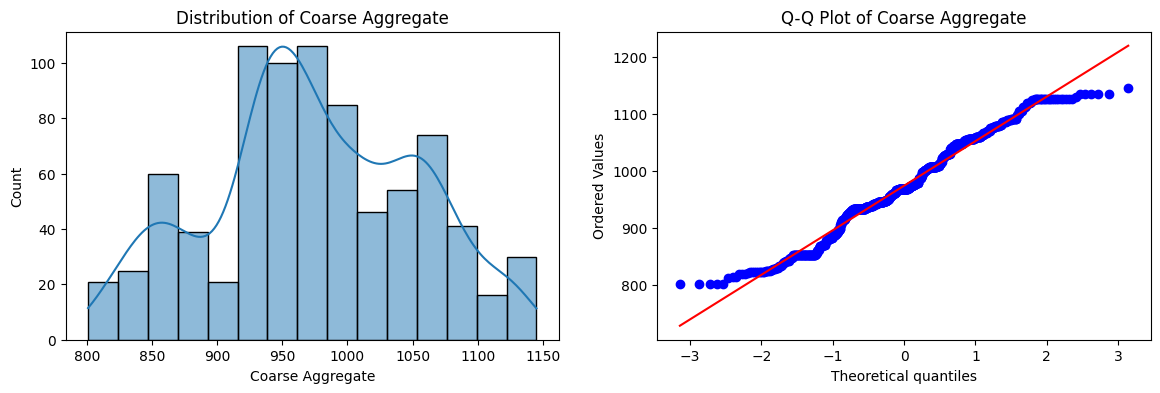

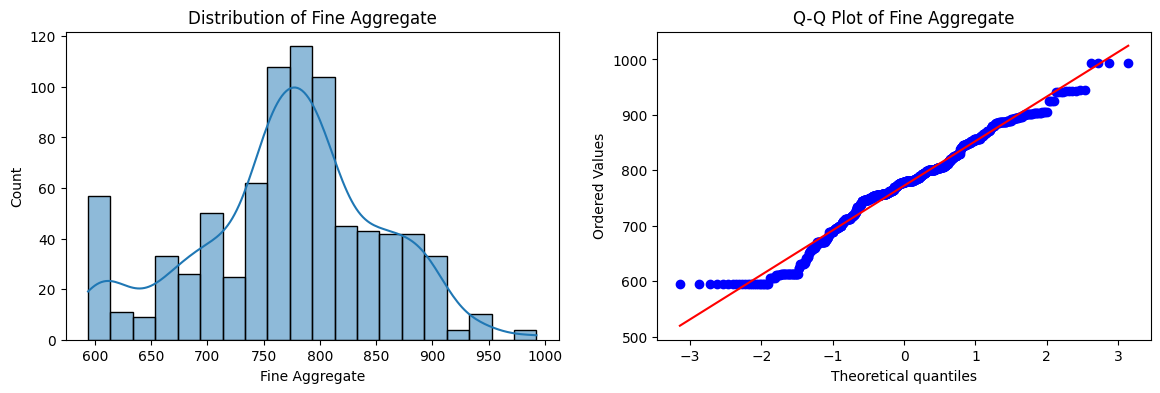

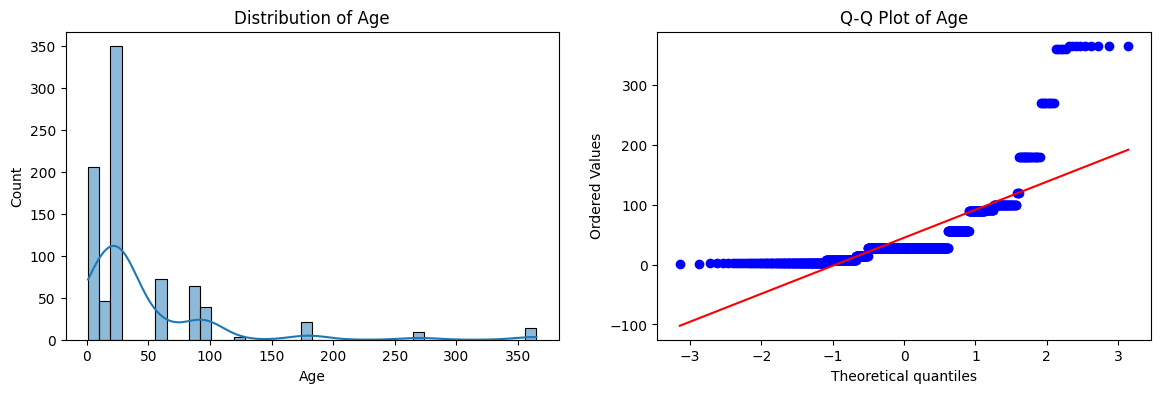

In [20]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))

    plt.subplot(1,2,1)
    sns.histplot(x_train[col], kde=True)  # use histplot (distplot is deprecated)
    plt.title(f"Distribution of {col}")

    plt.subplot(1,2,2)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")

    plt.show()


In [22]:
#box=cox
pt=PowerTransformer(method="box-cox")
x_train_box=pt.fit_transform(x_train+0.000001)
x_test_box=pt.transform(x_test+0.000001)
pd.DataFrame({'cols':x_train.columns,'box_cox_lamdas':pt.lambdas_})

,cols,box_cox_lamdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [23]:
lr=LinearRegression()
lr.fit(x_train_box,y_train)
y_pred=lr.predict(x_test_box)

In [26]:
r2_score(y_test,y_pred)

0.8047824993083206

In [27]:
#apply yeo-johnson
pt1=PowerTransformer(method="yeo-johnson")
x_train_yeo=pt1.fit_transform(x_train+0.000001)
x_test_yeo=pt1.transform(x_test+0.000001)
pd.DataFrame({'cols':x_train.columns,'yeo_johnson_lamdas':pt1.lambdas_})


,cols,yeo_johnson_lamdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [29]:
print(r2_score(y_test,y_pred))

0.8047824993083206
